<a href="https://colab.research.google.com/github/baxronovferuz1/DataScience_Np/blob/main/semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import fastai

print(fastai.__version__)
print(torch.__version__)

2.7.19
2.6.0+cu124


In [ ]:
from fastai.vision.all import *
import numpy as no

path=untar_data(URLs.CAMVID_TINY)
path.ls()

# label getter funtion
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}' #path=/root/.fastai/data/camvid_tiny


#dataloaders
# dls=SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),label_func=label_getter,codes=np.loadtxt(path/'codes.txt'),dtype=str)

codes = np.loadtxt(path/'codes.txt', dtype=str)
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path/'images'),
    label_func=label_getter,
    codes=codes
)

learn=unet_learner(dls, resnet34)
learn.fine_tune(10)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 134MB/s]


epoch,train_loss,valid_loss,time
0,3.203256,2.453429,00:02


epoch,train_loss,valid_loss,time
0,2.059635,1.882877,00:01
1,1.748017,1.373230,00:01
2,1.503135,1.136047,00:01
3,1.322326,0.918112,00:01
4,1.166976,0.847319,00:01
5,1.043351,0.741285,00:01
6,0.943502,0.775202,00:01
7,0.859566,0.728797,00:01
8,0.790877,0.689446,00:01
9,0.735971,0.687659,00:01


In [ ]:
!ls /root/.fastai/data/camvid_tiny/labels

0001TP_006750_P.png  0016E5_01500_P.png  0016E5_08550_P.png
0001TP_006840_P.png  0016E5_01920_P.png  Seq05VD_f00000_P.png
0001TP_007500_P.png  0016E5_02250_P.png  Seq05VD_f00090_P.png
0001TP_007860_P.png  0016E5_05190_P.png  Seq05VD_f00210_P.png
0001TP_008070_P.png  0016E5_05310_P.png  Seq05VD_f00420_P.png
0001TP_008160_P.png  0016E5_05730_P.png  Seq05VD_f00480_P.png
0001TP_008400_P.png  0016E5_05940_P.png  Seq05VD_f00810_P.png
0001TP_008580_P.png  0016E5_06090_P.png  Seq05VD_f00990_P.png
0001TP_008670_P.png  0016E5_06240_P.png  Seq05VD_f01080_P.png
0001TP_008700_P.png  0016E5_06300_P.png  Seq05VD_f01260_P.png
0001TP_008760_P.png  0016E5_06570_P.png  Seq05VD_f01320_P.png
0001TP_008940_P.png  0016E5_06810_P.png  Seq05VD_f01440_P.png
0001TP_009000_P.png  0016E5_06870_P.png  Seq05VD_f01830_P.png
0001TP_009150_P.png  0016E5_06990_P.png  Seq05VD_f01890_P.png
0001TP_009360_P.png  0016E5_07290_P.png  Seq05VD_f01950_P.png
0001TP_009840_P.png  0016E5_07973_P.png  Seq05VD_f02070_P.png
0001TP_009

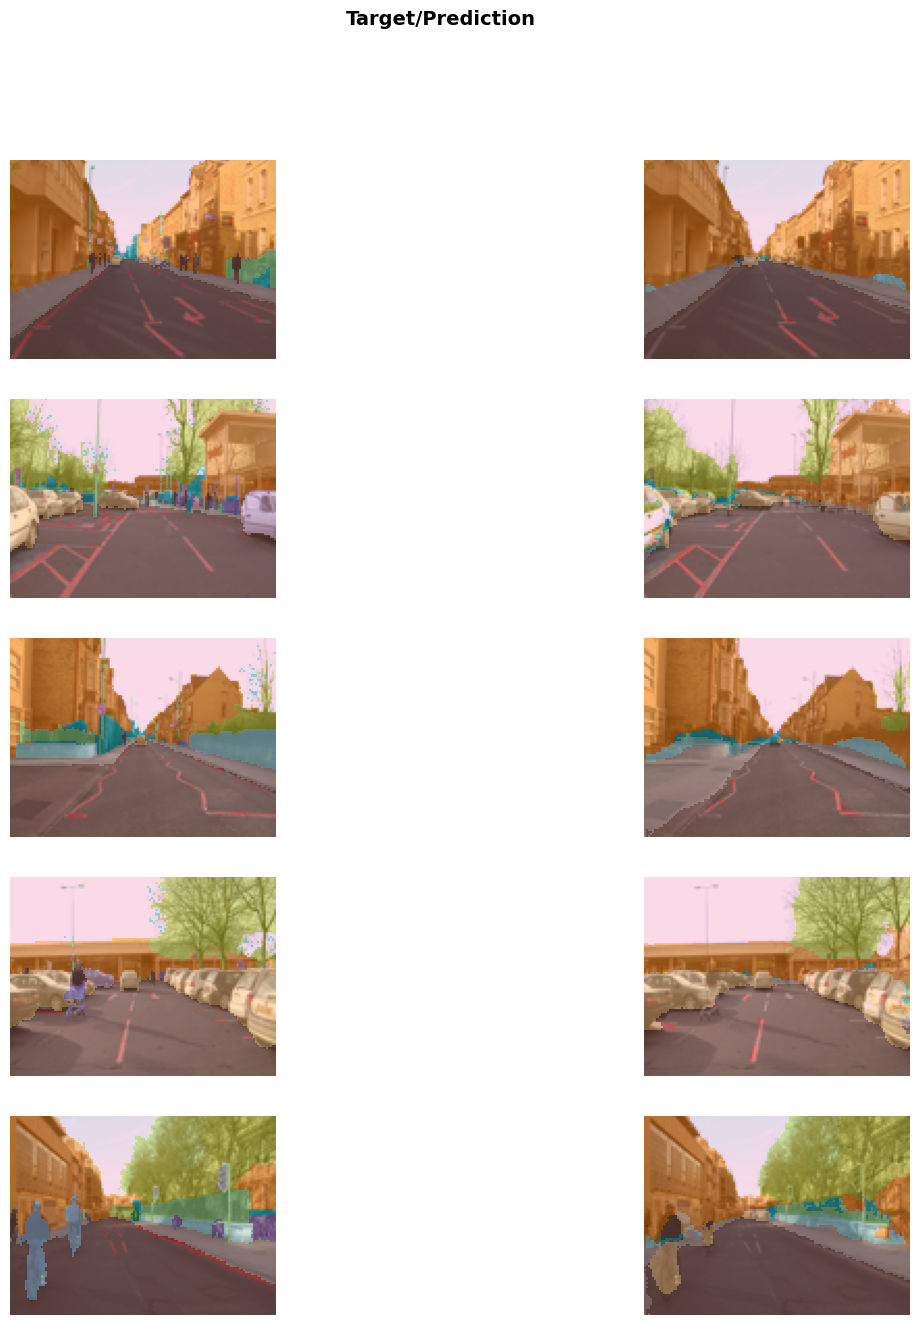

In [ ]:
learn.show_results(max_n=5, figsize=(15,15))

Easy NLP-model

In [ ]:
from fastai.text.all import *

# dataset
path=untar_data(URLs.IMDB)

# dataloaders
data_loaders=TextDataLoaders.from_folder(path, train='train', valid='test')


# finetune
learn=text_classifier_learner(data_loaders,AWD_LSTM,drop_mult=0.6, metrics=accuracy)
learn.fine_tune(3,0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.484229,0.426084,0.804560,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.300909,0.248477,0.901880,07:20
1,0.253400,0.207440,0.919560,07:19


Tabular data and Tabular model

In [13]:
import pandas as pd
import numpy as np


In [1]:
from google.colab import files
upload=files.upload()

Saving adult.csv to adult.csv


In [24]:
adult_data=pd.read_csv("/content/adult.csv")
adult_data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [20]:
adult_data.rename(columns={
    'age': 'Age',
    'workclass': 'Workclass',
    'fnlwgt': 'Fnlwgt',
    'education': 'Education',
    'education.num': 'Education_num',
    'marital.status': 'Marital_status',
    'occupation': 'Occupation',
    'relationship': 'Relationship',
    'race': 'Race',
    'sex': 'Sex',
    'capital.gain': 'Capital_gain',
    'capital.loss': 'Capital_loss',
    'hours.per.week': 'Hours_per_week',
    'native.country': 'Native_country',
    'income': 'income'
}, inplace=True)


In [21]:
adult_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
(adult_data == '?').any(axis=1).sum()

np.int64(2399)

In [26]:
# from fastai.tabular.all import *

# path=untar_data(URLs.ADULT_SAMPLE)

# # dataloaders
# dls=TabularDataLoaders.from_csv(path/'adult.csv', path=path,bs=64, y_names='Income',
#                                 cat_names=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country'],
#                                 cont_names=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week'],
#                                 procs=[Categorify, FillMissing, Normalize])

# # train
# learn=tabular_learner(dls, metrics=accuracy)

# learn.fit_one_cycle(3)

In [9]:
# path.ls()

In [25]:
print(adult_data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
